<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

mpl.style.use('ggplot')  # optional: for ggplot-like style

In [23]:
import numpy as np

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


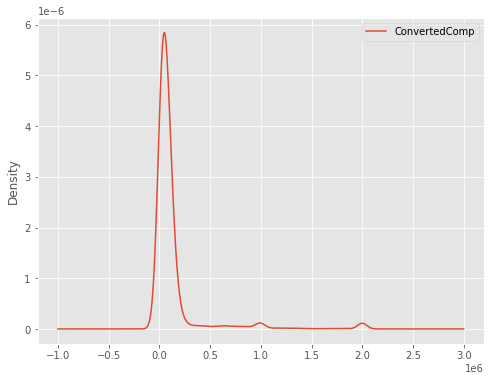

In [82]:
# your code goes here
df[['ConvertedComp']].plot(kind='kde', figsize=(8,6))
plt.show()

Plot the histogram for the column `ConvertedComp`.


In [87]:
count, bin_edges = np.histogram(df['ConvertedComp'].dropna())

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[9659  238  115  125   99  131   34   15   15  151]
[      0.  200000.  400000.  600000.  800000. 1000000. 1200000. 1400000.
 1600000. 1800000. 2000000.]


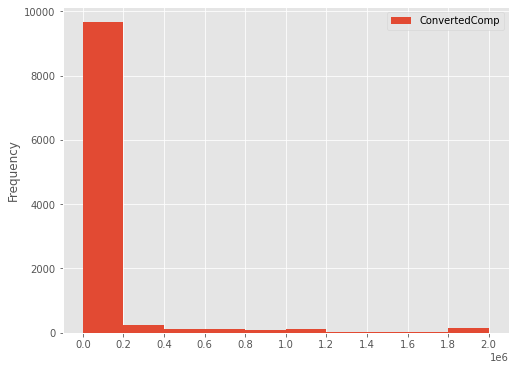

In [88]:
# your code goes here
count, bin_edges = np.histogram(df['ConvertedComp'].dropna())
df[['ConvertedComp']].plot(kind='hist', figsize=(8,6), xticks = bin_edges)
plt.show()

In [79]:
df['Age'].median()

29.0

What is the median of the column `ConvertedComp`?


In [9]:
# your code goes here
df['ConvertedComp'].median()

57745.0

In [10]:
df.columns.to_list()

['Respondent',
 'MainBranch',
 'Hobbyist',
 'OpenSourcer',
 'OpenSource',
 'Employment',
 'Country',
 'Student',
 'EdLevel',
 'UndergradMajor',
 'EduOther',
 'OrgSize',
 'DevType',
 'YearsCode',
 'Age1stCode',
 'YearsCodePro',
 'CareerSat',
 'JobSat',
 'MgrIdiot',
 'MgrMoney',
 'MgrWant',
 'JobSeek',
 'LastHireDate',
 'LastInt',
 'FizzBuzz',
 'JobFactors',
 'ResumeUpdate',
 'CurrencySymbol',
 'CurrencyDesc',
 'CompTotal',
 'CompFreq',
 'ConvertedComp',
 'WorkWeekHrs',
 'WorkPlan',
 'WorkChallenge',
 'WorkRemote',
 'WorkLoc',
 'ImpSyn',
 'CodeRev',
 'CodeRevHrs',
 'UnitTests',
 'PurchaseHow',
 'PurchaseWhat',
 'LanguageWorkedWith',
 'LanguageDesireNextYear',
 'DatabaseWorkedWith',
 'DatabaseDesireNextYear',
 'PlatformWorkedWith',
 'PlatformDesireNextYear',
 'WebFrameWorkedWith',
 'WebFrameDesireNextYear',
 'MiscTechWorkedWith',
 'MiscTechDesireNextYear',
 'DevEnviron',
 'OpSys',
 'Containers',
 'BlockchainOrg',
 'BlockchainIs',
 'BetterLife',
 'ITperson',
 'OffOn',
 'SocialMedia',
 'Ext

How many responders identified themselves only as a **Man**?


In [15]:
# your code goes here
df[df['Gender']=='Man']['Respondent'].count()

10480

In [16]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [17]:
# your code goes here
df[df['Gender']=='Woman']['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


In [89]:
df['Age'].isna().sum()

287

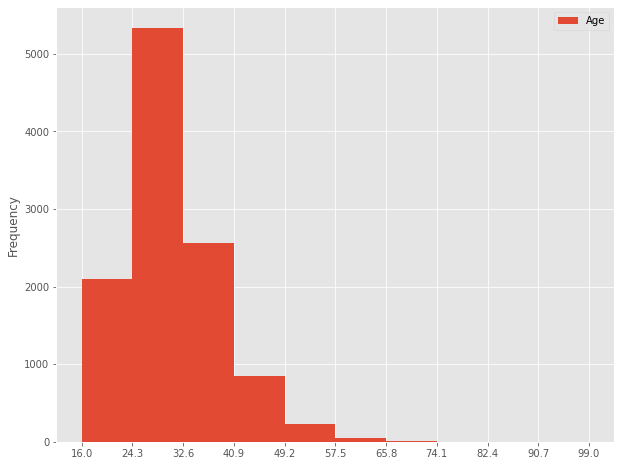

In [92]:
# your code goes here
count, bin_edges = np.histogram(df['Age'].dropna())
df[['Age']].plot(kind='hist', figsize=(10,8), xticks = bin_edges)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


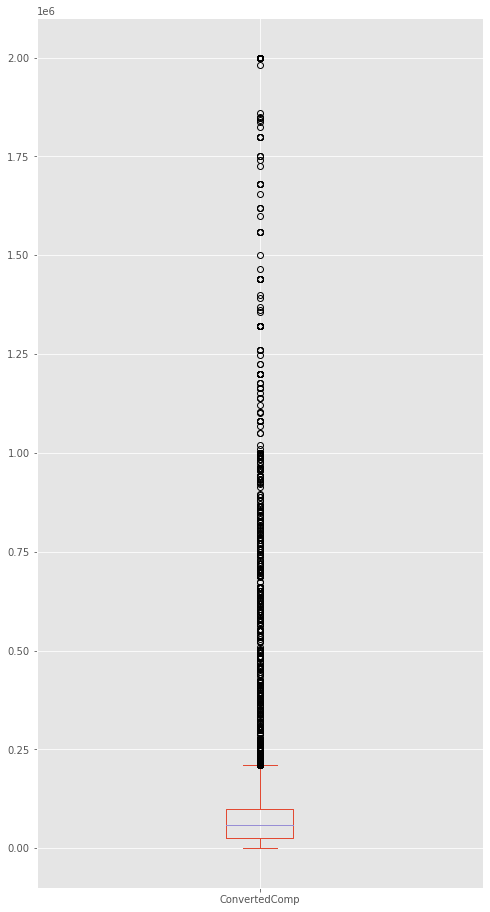

In [97]:
# your code goes here
df[['ConvertedComp']].plot(kind='box', figsize=(8,16))
plt.show()

In [100]:
df[df['ConvertedComp'] < lower]['Respondent'].count()

0

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [43]:
len(df['ConvertedComp'].dropna())

10582

In [44]:
data = np.array(df['ConvertedComp'].dropna())

In [45]:
# your code goes here
q1, q3 = np.percentile(data, [25, 75])
print(q3, q1)

100000.0 26868.0


In [46]:
IQR = q3-q1
IQR

73132.0

Find out the upper and lower bounds.


In [52]:
# your code goes here
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR
lower, upper

(-82830.0, 209698.0)

Identify how many outliers are there in the `ConvertedComp` column.


In [69]:
# your code goes here
df[df['ConvertedComp'] < upper]['Respondent'].count()

9703

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [64]:
# your code goes here
df_new = df[df['ConvertedComp'] < upper].reset_index(drop=True)
df_new.tail()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
9698,25134,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ecuador,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers,32.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,No,Appropriate in length,Easy
9699,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
9700,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
9701,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
9702,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,Somewhat less welcome now than last year,NaN,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy


In [65]:
df_new.shape

(9703, 85)

In [95]:
df['ConvertedComp'].median(), df_new['ConvertedComp'].median()

(57745.0, 52704.0)

In [101]:
df_new['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [78]:
# your code goes here
df.corr(numeric_only=True)['Age'].to_frame()

,Age
Respondent,0.004041
CompTotal,0.006970
ConvertedComp,0.105386
WorkWeekHrs,0.036518
CodeRevHrs,-0.020469
Age,1.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
